In [26]:
from collections import Counter
from sklearn.datasets import make_classification

In [27]:
X,y=make_classification(n_samples=10000,n_features=2, n_clusters_per_class=1,
                        n_redundant=0,weights=[0.99],random_state=15)


In [28]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
Counter(y)

Counter({np.int64(0): 9847, np.int64(1): 153})

<Axes: xlabel='0', ylabel='1'>

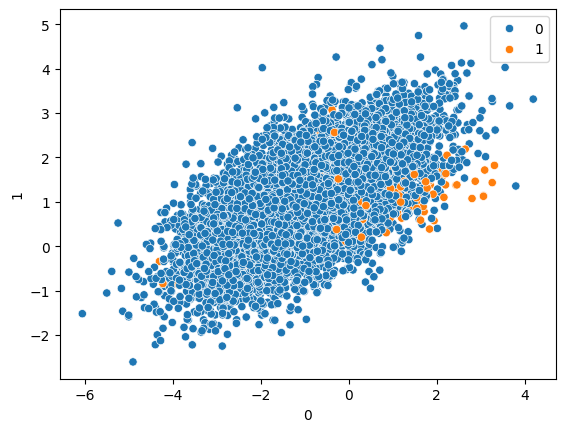

In [30]:
import seaborn as sns
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [32]:
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
params = dict(penalty = penalty,C = c_values,solver=solver,class_weight = class_weight)     

In [34]:
## Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [35]:
grid.fit(X_train,y_train)

f:\ML Revise\krishenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML Revise\krishenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML Revise\krishenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML Revise\krishenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML Revise\krishenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\ML Revise\krishenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [36]:
grid.best_params_

{'C': 10, 'class_weight': {0: 50, 1: 10}, 'penalty': 'l1', 'solver': 'saga'}

In [37]:
y_pred = grid.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.9648
[[2408   55]
 [  33    4]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2463
           1       0.07      0.11      0.08        37

    accuracy                           0.96      2500
   macro avg       0.53      0.54      0.53      2500
weighted avg       0.97      0.96      0.97      2500

